In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)


In [2]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')

In [3]:
df.head(6)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.innings.unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [5]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [6]:
df.innings.unique()

array([1, 2], dtype=int64)

In [7]:
# What are the numbers when ABD faces Bumrah?
# step 1: Filter by player names - Done
# step 2: Use these names & assign it to striker & bowler - Done
# step 3: Get the required columns - Done

In [8]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [9]:
df[df.bowling_team == 'Sunrisers Hyderabad']['bowler'].unique()

array(['A Mishra', 'NLTC Perera', 'I Sharma', 'DW Steyn', 'CL White',
       'A Ashish Reddy', 'Ankit Sharma', 'GH Vihari', 'Anand Rajan',
       'KV Sharma', 'DJG Sammy', 'B Kumar', 'IK Pathan',
       'Y Venugopal Rao', 'MC Henriques', 'Parvez Rasool', 'JO Holder',
       'RS Bopara', 'TA Boult', 'P Kumar', 'Bipul Sharma',
       'Mustafizur Rahman', 'A Nehra', 'BB Sran', 'DJ Hooda',
       'Yuvraj Singh', 'BCJ Cutting', 'KS Williamson', 'Rashid Khan',
       'Mohammad Nabi', 'S Kaul', 'Mohammed Siraj', 'CJ Jordan',
       'B Stanlake', 'Shakib Al Hasan', 'Sandeep Sharma', 'Basil Thampi',
       'YK Pathan', 'CR Brathwaite', 'KK Ahmed', 'S Nadeem', 'V Shankar',
       'Abhishek Sharma', 'T Natarajan', 'MR Marsh', 'Abdul Samad',
       'DA Warner', 'Mujeeb Ur Rahman', 'J Suchith'], dtype=object)

In [77]:
df[df.bowling_team == 'Kolkata Knight Riders']['bowler'].unique()

array(['I Sharma', 'AB Agarkar', 'AB Dinda', 'SC Ganguly', 'LR Shukla',
       'DJ Hussey', 'Mohammad Hafeez', 'M Kartik', 'Umar Gul',
       'Iqbal Abdulla', 'Shoaib Akhtar', 'BAW Mendis', 'MC Henriques',
       'CH Gayle', 'Anureet Singh', 'BJ Hodge', 'SS Sarkar', 'AD Mathews',
       'Mashrafe Mortaza', 'CK Langeveldt', 'RS Gavaskar', 'SE Bond',
       'MB Parmar', 'JD Unadkat', 'MK Tiwary', 'JH Kallis', 'S Ladda',
       'R Bhatia', 'L Balaji', 'YK Pathan', 'RN ten Doeschate',
       'Shakib Al Hasan', 'B Lee', 'M de Lange', 'SP Narine',
       'PJ Sangwan', 'Mohammed Shami', 'R McLaren', 'SMSM Senanayake',
       'S Narwal', 'M Morkel', 'R Vinay Kumar', 'PP Chawla', 'UT Yadav',
       'AD Russell', 'SA Yadav', 'PJ Cummins', 'KC Cariappa', 'J Botha',
       'GB Hogg', 'Azhar Mahmood', 'JW Hastings', 'C Munro',
       'Kuldeep Yadav', 'R Sathish', 'JO Holder', 'AS Rajpoot',
       'CR Woakes', 'TA Boult', 'C de Grandhomme', 'NM Coulter-Nile',
       'N Rana', 'MG Johnson', 'TK Curra

In [10]:
# player 1: Rashid Khan
# player 2: AB de Villiers

In [11]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['W Jaffer', 'JH Kallis', 'CL White', 'MV Boucher', 'R Dravid',
       'V Kohli', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke', 'B Akhil',
       'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar', 'DW Steyn',
       'B Chipli', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble', 'J Arunkumar',
       'Abdur Razzak', 'SP Goswami', 'KP Pietersen', 'RV Uthappa',
       'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh', 'MK Pandey',
       'RE van der Merwe', 'KP Appanna', 'D du Preez', 'EJG Morgan',
       'A Mithun', 'S Sriram', 'MA Agarwal', 'AB de Villiers',
       'TM Dilshan', 'SS Tiwary', 'AUK Pathan', 'S Aravind', 'CA Pujara',
       'JJ van der Wath', 'R Ninan', 'DL Vettori', 'CH Gayle',
       'J Syed Mohammad', 'M Kaif', 'LA Pomersbach', 'KB Arun Karthik',
       'CK Langeveldt', 'AB McDonald', 'HV Patel', 'RR Bhatkal',
       'M Muralitharan', 'P Parameswaran', 'DT Christian', 'KK Nair',
       'MC Henriques', 'M Kartik', 'JD Unadkat', 'R Rampaul', 'KL Rahul',
       'A Mukund', 'P

In [12]:
req_df = df[(df.striker == 'AB de Villiers') & (df.bowler == 'Rashid Khan')]

In [13]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
159496,1136599,2018,2018-05-07,Rajiv Gandhi International Stadium,2,8.5,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,V Kohli,Rashid Khan,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159497,1136599,2018,2018-05-07,Rajiv Gandhi International Stadium,2,8.6,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,V Kohli,Rashid Khan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159569,1136599,2018,2018-05-07,Rajiv Gandhi International Stadium,2,10.3,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,MM Ali,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159570,1136599,2018,2018-05-07,Rajiv Gandhi International Stadium,2,10.4,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,MM Ali,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,AB de Villiers,NaN,NaN
162420,1136611,2018,2018-05-17,M.Chinnaswamy Stadium,1,6.2,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,MM Ali,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# runs scored
sum(req_df.runs_off_bat)

38

In [15]:
# balls faced
len(req_df)

39

In [16]:
# outs
len(req_df[req_df.player_dismissed == 'AB de Villiers'])

3

In [17]:
# strike rate
100*sum(req_df.runs_off_bat)/len(req_df)

97.43589743589743

In [18]:
# Comparision against all batsman Rashid khan has bowled to

In [19]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [20]:
Rashid_df = df[df.bowler =='Rashid Khan']

In [21]:
Rashid_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
136597,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.2,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136598,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.3,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136599,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.4,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,Mandeep Singh,NaN,NaN
136600,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.5,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136601,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.6,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# runs scored by this batsman
rdf1 = pd.DataFrame(Rashid_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [23]:
rdf2 = pd.DataFrame(Rashid_df.groupby('striker')['ball'].count()).reset_index()

In [24]:
rdf2.head()

,striker,ball
0,AB de Villiers,39
1,AD Mathews,2
2,AD Russell,14
3,AJ Finch,25
4,AM Rahane,34


In [25]:
rdf3 = rdf1.merge(rdf2, on = 'striker', how = 'left')

In [26]:
rdf3.head()

,striker,runs_off_bat,ball
0,AB de Villiers,38,39
1,AD Mathews,2,2
2,AD Russell,10,14
3,AJ Finch,37,25
4,AM Rahane,41,34


In [27]:
rdf3['strike_rate'] = 100*rdf3['runs_off_bat']/rdf3['ball']

In [28]:
rdf3.head(1)

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,38,39,97.435897


In [29]:
# min criteria: 30 balls

In [30]:
rdf3 = rdf3[rdf3.ball >= 30]

In [31]:
rdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,38,39,97.435897
4,AM Rahane,41,34,120.588235
7,AT Rayudu,61,54,112.962963
33,HH Pandya,18,33,54.545455
37,Ishan Kishan,53,45,117.777778


In [32]:
abd_df = df[df.striker =='AB de Villiers']

In [33]:
# runs scored by this batsman
adf1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [34]:
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [35]:
# balls faced
adf2 = pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index()

In [36]:
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [37]:
adf3 = adf1.merge(adf2, on = 'bowler', how = 'left')

In [38]:
adf3.head(1)

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18


In [39]:
adf3['strike_rate'] = 100*adf3['runs_off_bat']/adf3['ball']

In [40]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [41]:
# min criteria : 30 balls

In [42]:
adf3 = adf3[adf3.ball >= 30]

In [43]:
# bdf3, adf3

In [44]:
rdf3.reset_index(inplace = True, drop = True)
adf3.reset_index(inplace = True, drop = True)

In [45]:
rdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,38,39,97.435897
1,AM Rahane,41,34,120.588235
2,AT Rayudu,61,54,112.962963
3,HH Pandya,18,33,54.545455
4,Ishan Kishan,53,45,117.777778


In [46]:
# adf3.sort_values('strike_rate', ascending = False)

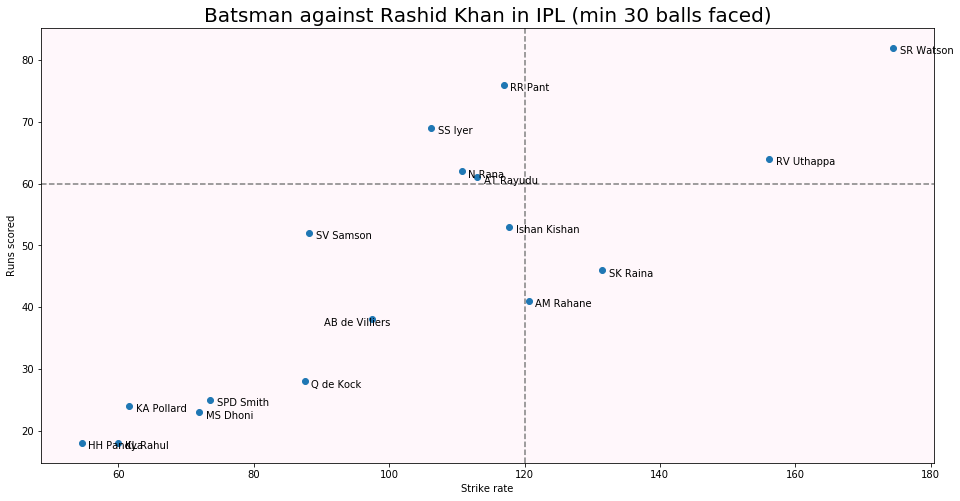

In [75]:
plt.figure(figsize = (16, 8))
plt.scatter(rdf3.strike_rate, rdf3.runs_off_bat)

for i in range(len(rdf3)):
#     plt.text(x, y, text)
    if rdf3['striker'][i] == 'AB de Villiers':
        plt.text(rdf3['strike_rate'][i] - 7, rdf3['runs_off_bat'][i] - 1, rdf3['striker'][i] )
    else:
        plt.text(rdf3['strike_rate'][i] + 1, rdf3['runs_off_bat'][i] - 1, rdf3['striker'][i] )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title('Batsman against Rashid Khan in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

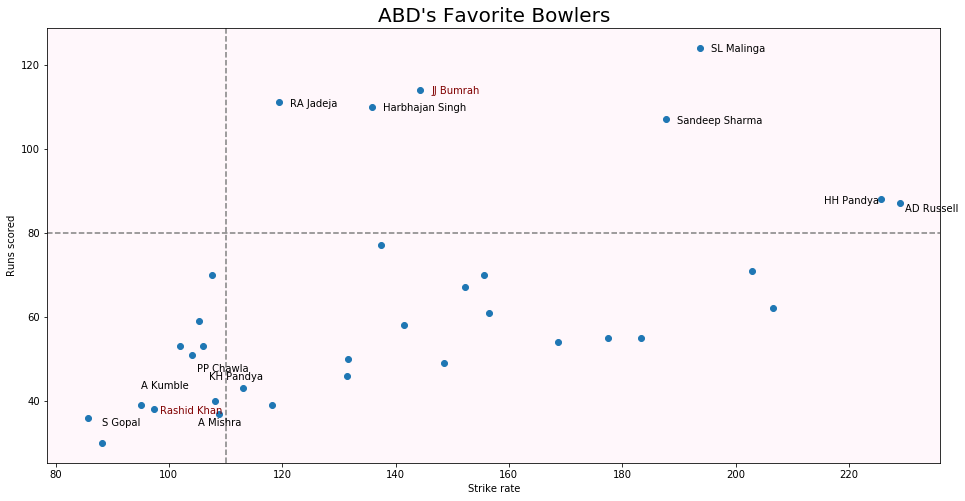

In [98]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)

for i in range(len(adf3)):
    if adf3.bowler[i] == 'Rashid Khan':
        plt.text(adf3.strike_rate[i] + 1, adf3.runs_off_bat[i] - 1, adf3.bowler[i], color = 'maroon')
    
    if adf3.bowler[i] == 'JJ Bumrah':
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i], color = 'maroon')
    elif (adf3.bowler[i] == 'RA Jadeja') | (adf3.bowler[i] == 'SL Malinga') | (adf3.bowler[i] == 'Sandeep Sharma') | (adf3.bowler[i] == 'Harbhajan Singh'):
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i])
    elif (adf3.bowler[i] == 'S Gopal')|(adf3.bowler[i]=='A Kumble'):
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i] + 4, adf3.bowler[i])
    elif (adf3.bowler[i] == 'A Mishra'):
        plt.text(adf3.strike_rate[i] - 3, adf3.runs_off_bat[i] - 6, adf3.bowler[i])
    elif (adf3.bowler[i] == 'PP Chawla')|(adf3.bowler[i]=='KH Pandya'):
        plt.text(adf3.strike_rate[i] +3, adf3.runs_off_bat[i] - 6, adf3.bowler[i])
    elif (adf3.bowler[i] == 'HH Pandya'):
        plt.text(adf3.strike_rate[i] -10, adf3.runs_off_bat[i] - 1, adf3.bowler[i])
    elif (adf3.bowler[i]=='AD Russell'):
        plt.text(adf3.strike_rate[i] +1, adf3.runs_off_bat[i] - 2, adf3.bowler[i])

plt.axvline(110, ls = '--', color = 'grey')
plt.axhline(80, ls = '--', color = 'grey')
plt.title("ABD's Favorite Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part2.jpg')
plt.show()